# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')
# data.shape
print(data.columns)
data.head(2)

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = data.drop(['project_is_approved'],axis = 1)
Y = data[['project_is_approved']]

X_train,X_rem,Y_train,Y_rem = train_test_split(X,Y,test_size = 0.40,stratify = Y)
X_cv,X_test,Y_cv,Y_test = train_test_split(X_rem,Y_rem,test_size = 0.50,stratify = Y_rem)
X.shape,X_train.shape,X_cv.shape,X_test.shape

((109248, 8), (65548, 8), (21850, 8), (21850, 8))

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

print(X_train.shape, Y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)

vectorizer = CountVectorizer(min_df = 10, ngram_range=(1,4), max_features= 5000)
vectorizer.fit(X_train['essay'].values)


(65548, 8) (65548, 1)
(21850, 8) (21850, 1)
(21850, 8) (21850, 1)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [4]:
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_essay_features = vectorizer.get_feature_names()

print(X_train_essay_bow.shape)
print(X_test_essay_bow.shape)
print(X_cv_essay_bow.shape)

(65548, 5000)
(21850, 5000)
(21850, 5000)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [5]:
# encoding categorical features: School State

vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)
X_state_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_state_ohe.shape, Y_train.shape)
print(X_cv_state_ohe.shape, Y_cv.shape)
print(X_test_state_ohe.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(65548, 51) (65548, 1)
(21850, 51) (21850, 1)
(21850, 51) (21850, 1)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [6]:
# encoding categorical features: teacher_prefix

vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)
X_teacher_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_teacher_ohe.shape, Y_train.shape)
print(X_cv_teacher_ohe.shape, Y_cv.shape)
print(X_test_teacher_ohe.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(65548, 5) (65548, 1)
(21850, 5) (21850, 1)
(21850, 5) (21850, 1)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [7]:
# encoding categorical features: clean_categories

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data
# print(vectorizer.get_feature_names())
# we use the fitted CountVectorizer to convert the text to vector
X_train_category_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_category_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_category_ohe = vectorizer.transform(X_test['clean_categories'].values)
X_category_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_category_ohe.shape, Y_train.shape)
print(X_cv_category_ohe.shape, Y_cv.shape)
print(X_test_category_ohe.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(65548, 9) (65548, 1)
(21850, 9) (21850, 1)
(21850, 9) (21850, 1)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [8]:
# encoding categorical features: clean_subcategories

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data
# print(vectorizer.get_feature_names())
# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategory_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcategory_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcategory_ohe = vectorizer.transform(X_test['clean_subcategories'].values)
X_subcategory_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_subcategory_ohe.shape, Y_train.shape)
print(X_cv_subcategory_ohe.shape, Y_cv.shape)
print(X_test_subcategory_ohe.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(65548, 30) (65548, 1)
(21850, 30) (21850, 1)
(21850, 30) (21850, 1)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [9]:
# encoding categorical features: project_grade_category

vectorizer = CountVectorizer()

vectorizer.fit(X_train['project_grade_category'].values) #

vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)
X_grade_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_grade_ohe.shape, Y_train.shape)
print(X_cv_grade_ohe.shape, Y_cv.shape)
print(X_test_grade_ohe.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(65548, 4) (65548, 1)
(21850, 4) (21850, 1)
(21850, 4) (21850, 1)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [10]:
# encoding numerical features: Price

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1)).reshape(-1,1)
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1)).reshape(-1,1)
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1)).reshape(-1,1)
X_price_features = ['price']


print("After vectorizations")
print(X_train_price_norm.shape, Y_train.shape)
print(X_cv_price_norm.shape, Y_cv.shape)
print(X_test_price_norm.shape, Y_test.shape)
print("="*100)

After vectorizations
(65548, 1) (65548, 1)
(21850, 1) (21850, 1)
(21850, 1) (21850, 1)


## 1.5 Concatinating all the features

In [11]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe, X_train_price_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_category_ohe,X_cv_subcategory_ohe, X_cv_price_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe, X_test_price_norm)).tocsr()
X_feature = X_essay_features + X_state_features + X_teacher_features + X_grade_features + X_category_features + X_subcategory_features + X_price_features

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)
print('Feature size:',len(X_feature))
print("="*100)


Final Data matrix
(65548, 5100) (65548, 1)
(21850, 5100) (21850, 1)
(21850, 5100) (21850, 1)
Feature size: 5100


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 1.5.1 Appling NB: BOW featurization

In [12]:
def batch_predict(cfg,data):
    loop = data.shape[0]-data.shape[0]%1000
    y_data_predict = []
    for i in range(0,loop,1000):
        y_data_predict.extend(cfg.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_predict.extend(cfg.predict_proba(data[loop:])[:,1])
        
    return y_data_predict

100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


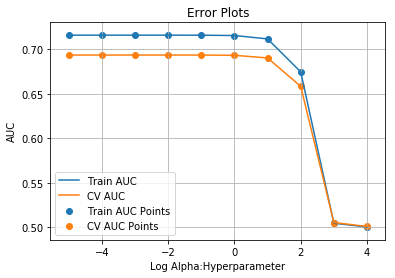

In [13]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

train_auc = []
cv_auc = []
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    model = MultinomialNB(alpha = i,class_prior = [0.5, 0.5])
    model.fit(X_tr,Y_train)
    
    Y_train_predict = batch_predict(model,X_tr)
    Y_cv_predict = batch_predict(model,X_cr)
    
    train_auc.append(roc_auc_score(Y_train,Y_train_predict))
    cv_auc.append(roc_auc_score(Y_cv,Y_cv_predict))

log_alpha = [math.log10(i) for i in alpha]
plt.plot(log_alpha,train_auc,label = 'Train AUC')
plt.plot(log_alpha,cv_auc,label= 'CV AUC')

plt.scatter(log_alpha,train_auc,label = 'Train AUC Points')
plt.scatter(log_alpha,cv_auc,label = 'CV AUC Points')

plt.legend()
plt.xlabel('Log Alpha:Hyperparameter')
plt.ylabel('AUC')
plt.title('Error Plots')
plt.grid()
plt.show()

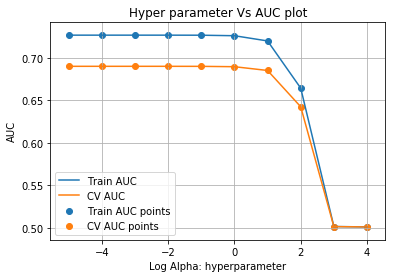

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.664416,0.055339,0.689952,0.726630,1e-05,{'alpha': 1e-05},1,0.691539,0.728066,0.692299,0.725827,0.686018,0.725998,0.032319,0.012920,0.002799,0.001017
1,0.629079,0.076343,0.689952,0.726630,0.0001,{'alpha': 0.0001},2,0.691539,0.728066,0.692299,0.725827,0.686018,0.725998,0.042173,0.001701,0.002799,0.001017
2,0.761762,0.084342,0.689951,0.726629,0.001,{'alpha': 0.001},3,0.691538,0.728065,0.692298,0.725826,0.686018,0.725997,0.130902,0.009844,0.002799,0.001018
3,1.122807,0.104347,0.689947,0.726624,0.01,{'alpha': 0.01},4,0.691534,0.728059,0.692295,0.725821,0.686014,0.725991,0.050816,0.009032,0.002799,0.001018
4,0.888445,0.076676,0.689907,0.726563,0.1,{'alpha': 0.1},5,0.691488,0.728003,0.692253,0.725760,0.685978,0.725927,0.145510,0.011616,0.002795,0.001020


In [14]:
from sklearn.metrics import roc_curve, auc
import pandas as pd

model_bow = MultinomialNB(class_prior = [0.5, 0.5])
parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000],}

clf_bow = GridSearchCV(model_bow,parameters,cv = 3,n_jobs = -1,scoring = 'roc_auc')
clf_bow.fit(X_tr,Y_train)

results = pd.DataFrame.from_dict(clf_bow.cv_results_)
# print(results.head())
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
log_alpha =  [math.log10(i) for i in results['param_alpha']]

plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Log Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [15]:
 best_alpha = 100

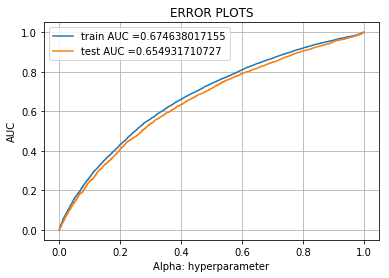

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_model_bow = MultinomialNB(alpha = best_alpha)
best_model_bow.fit(X_tr,Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(best_model_bow, X_tr)    
y_test_pred = batch_predict(best_model_bow, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [17]:
import numpy as np

# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [18]:
from sklearn.metrics import confusion_matrix

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.400015020153 for threshold 1.0
Train confusion matrix
[[ 6371  3554]
 [20961 34662]]
Test confusion matrix
[[ 2045  1264]
 [ 7116 11425]]


## 1.6 Applying Naive Bayes: TfIDF featurization

### 1.6.1 Make Data Model Ready: encoding eassay, and project_title

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

print(X_train.shape, Y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_test.shape, Y_test.shape)

vectorizer = TfidfVectorizer(min_df = 10, ngram_range=(1,4), max_features= 5000)
# vectorizer.fit(X_train['essay'].values)

(65548, 8) (65548, 1)
(21850, 8) (21850, 1)
(21850, 8) (21850, 1)


In [22]:
vectorizer.fit(X_train['essay'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [23]:
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)

print(X_train_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)
print(X_cv_essay_tfidf.shape)

(65548, 5000)
(21850, 5000)
(21850, 5000)


### 1.6.2 Concatinating all the features

In [24]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_category_ohe,X_train_subcategory_ohe, X_train_price_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_category_ohe,X_cv_subcategory_ohe, X_cv_price_norm)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_category_ohe,X_test_subcategory_ohe, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, Y_train.shape)
print(X_tr_tfidf.shape, Y_cv.shape)
print(X_tr_tfidf.shape, Y_test.shape)
print("="*100)


Final Data matrix
(65548, 5100) (65548, 1)
(65548, 5100) (21850, 1)
(65548, 5100) (21850, 1)


### 1.6.3 Appling NB: TfIdf featurization

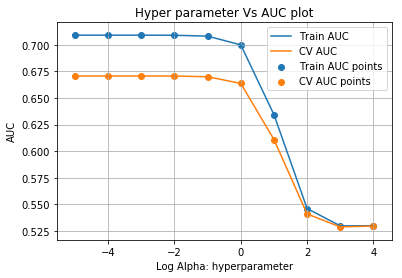

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.742389,0.052338,0.670590,0.708945,1e-05,{'alpha': 1e-05},1,0.677290,0.713129,0.671664,0.705793,0.662815,0.707911,0.132715,0.004786,0.005958,0.003083
1,0.589043,0.051338,0.670589,0.708944,0.0001,{'alpha': 0.0001},2,0.677289,0.713129,0.671663,0.705792,0.662814,0.707910,0.066057,0.012229,0.005958,0.003083
2,0.646714,0.070339,0.670583,0.708935,0.001,{'alpha': 0.001},3,0.677282,0.713121,0.671657,0.705784,0.662808,0.707901,0.094178,0.014638,0.005958,0.003083
3,0.931405,0.104006,0.670520,0.708852,0.01,{'alpha': 0.01},4,0.677217,0.713042,0.671590,0.705699,0.662753,0.707815,0.141087,0.038510,0.005953,0.003086
4,0.961071,0.100674,0.669893,0.708019,0.1,{'alpha': 0.1},5,0.676565,0.712253,0.670930,0.704853,0.662184,0.706952,0.041220,0.020338,0.005917,0.003114


In [25]:
model_tfidf = MultinomialNB()
parameters = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}

clf_idf = GridSearchCV(model_tfidf,parameters,cv = 3,n_jobs = -1,scoring = 'roc_auc')
clf_idf.fit(X_tr_tfidf,Y_train)

results = pd.DataFrame.from_dict(clf_idf.cv_results_)
# print(results.head())
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
log_alpha =  [math.log10(i) for i in results['param_alpha']]

plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Log Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [27]:
best_alpha = 10

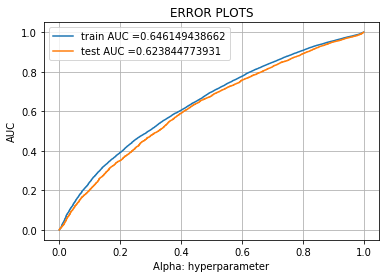

In [28]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_model_tfidf = MultinomialNB(alpha = best_alpha)
best_model_tfidf.fit(X_tr_tfidf,Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_tfidf = batch_predict(best_model_tfidf, X_tr_tfidf)    
y_test_pred_tfidf = batch_predict(best_model_tfidf, X_te_tfidf)

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(Y_train, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(Y_test, y_test_pred_tfidf)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

### 3.1 Top 20 Features of Set 1

In [29]:
neg_class_prob_sorted = abs(best_model_bow.feature_log_prob_[0, :]).argsort()[::-1]
pos_class_prob_sorted = abs(best_model_bow.feature_log_prob_[1, :]).argsort()

print('Printing top 20 Feature for Negative Class:\n', np.take(X_feature, neg_class_prob_sorted[:20]))
print()
print('Printing top 20 Feature for Positive Class:\n',np.take(X_feature, pos_class_prob_sorted[:20]))

Printing top 20 Feature for Negative Class:
 ['dr' 'vt' 'wy' 'nd' 'chromebooks allow' 'the wobble' 'these stools'
 'chairs help' 'the chromebooks' 'subscription' 'balance balls'
 'chairs allow' 'graphing' 'these chromebooks' 'stools allow' 'de'
 'core muscles' 'chromebooks students' 'reluctant readers'
 'chromebooks would']

Printing top 20 Feature for Positive Class:
 ['students' 'school' 'my' 'learning' 'classroom' 'the' 'not' 'they'
 'my students' 'learn' 'help' 'many' 'nannan' 'we' 'need' 'reading' 'work'
 'use' 'love' 'day']


### 3.2 Tabular Format

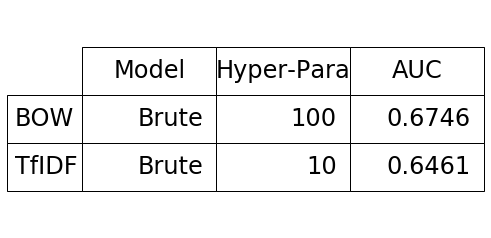

In [30]:
# https://pythonmatplotlibtips.blogspot.com/2018/11/matplotlib-only-table.html

fig = plt.figure()
ax = fig.add_subplot(111)
    
col_labels = ['Model','Hyper-Para','AUC']
row_labels = ['BOW','TfIDF']
table_vals = [['Brute', 100, '0.6746'],['Brute', 10, 0.6461]] 
# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 3,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(24)
the_table.scale(4, 4)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)